<a href="https://colab.research.google.com/github/hanna-joo/statistics/blob/master/stat_python/ch_14_clustering_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 14장. 군집분석 (Clustering Analysis)
- 14.1. 군집분석 기초
- 14.2. 계층적 군집분석
- 14.3. 비계층적 군집분석(K-평균 군집분석)

## 14.0. 준비하기

In [1]:
# 구글 드라이브 연동
from google.colab import drive # import drive from google colab

ROOT = "/content/drive"     # default location for the drive
print(ROOT)       
          # print content of ROOT (Optional)
drive.mount(ROOT, force_remount=True)

/content/drive
Mounted at /content/drive


In [2]:
from os.path import join  

MY_GOOGLE_DRIVE_PATH = '/content/drive/My Drive/Colab Notebooks/python_stat/python_stat_data/pythondata'
PROJECT_PATH = join(ROOT, MY_GOOGLE_DRIVE_PATH)

%cd "{PROJECT_PATH}"
%ls

/content/drive/My Drive/Colab Notebooks/python_stat/python_stat_data/pythondata
'실습파일_10장 분산분석.ipynb'
'실습파일_11장 회귀분석.ipynb'
'실습파일_12장 요인분석.ipynb'
'실습파일_13장 분류예측분석.ipynb'
'실습파일_14장 군집분석.ipynb'
'실습파일_15장 포지셔닝 분석.ipynb'
'실습파일_16장 컨조인트 분석.ipynb'
'실습파일_17장 비모수 통계분석.ipynb'
'실습파일_3장 파이썬 기초.ipynb'
'실습파일_4장 데이터전처리 및 기초분석.ipynb'
'실습파일_5장 기술통계분석.ipynb'
'실습파일_6장 t 검정.ipynb'
'실습파일_7장 상관관계분석.ipynb'
'실습파일_8장 범주형 데이터 분석.ipynb'
'실습파일_9장 신뢰성 분석.ipynb'
 Ashopping.csv
 CCA.csv
 Conjoint.csv
 Correspondence.csv
 부록_통계표.docx
 MDS1.csv
 MDS3.csv
'Step by Step 파이썬 비즈니스 통계분석_정오표.xlsx'


## 14.1. 군집분석 기초
- 군집분석
  + 집단 또는 범주에 대한 사전 정보가 없는 데이터의 경우,  
주어진 관측 값을 사용하여 전체를 몇 개의 유사한 집단으로 그룹화하여  
각 집단의 성격을 파악하기 위한 통계 분석기법
  + 분류 대상 개체들간의 유사성을 측정 및 유사성 높은 대상들을 그룹화하여  
데이터 전체의 구조와 특성 파악 가능
  + 분류 대상 개체
    + 물리적 개체(고객, 매장, 상품 등)  
    + 개념적 개체(구매유형, 고객의견, SNS 사용패턴, 휴대폰 통화유형 등)
- 군집분석의 종류
  + **계층적 군집분석**
    + 모든 개체들에 대해 순차적/계층적으로 군집 형성
    + 장점: 자료의 구조적 특성에 가장 적합한 군집 수 결정 가능하며 군집 형성과정을 비교적 명확하게 파악 가능
    + 단점: 분석 자료 크기가 커질수록 연산 오래 걸리고, 군집분석의 효율성 떨어짐
  + **비계층적 군집분석**
    + 계층적 군집분석 이외의 모든 군집분석 방법
    + K-평균 군집분석, 코호넨 네트워크 분석 많이 사용됨
    + 장점: **군집의 수를 미리 지정**해서 효율적인 군집형성이 빠르게 진행되기 때문에 대용량 데이터 군집분석 방법으로 적합
    + 단점: 해당 영역의 업무와 세분화에 대한 이해와 경험 필요 및 지정한 군집 수에 따라 군집들의 특성이 크게 달라질 수 있음


- 군집분석 과정: 군집분석 방법결정 > 분석변수 지정 > 이상치 제거 > 유사성 측정 > 군집화 > 군집특성 파악  
  1. **군집분석 방법결정**
    - 군집분석의 목적과 데이터 특성에 따라 최적의 군집분석 방법 결정
    - 계층적: 탐색적 목적이 강하거나 분류 개체의 규모가 크지 않을 경우  
    - 비계층적: 내부적으로 확정된 군집 수에 의해 대규모 분류 개체 적용할 경우  
  2. **분석변수 지정**
    - 유사성(거리)을 측정하는데 사용될 분석변수 지정 (군집 품질 좌우)
    - 가급적 수치형 척도로 측정된 변수들이 바람직
  3. **이상치 제거**
    - 분류대상 개체들의 분포 파악하여 극단값을 가지는 이상치(outlier) 분석에서 제외
  4. **유사성 측정**
    - 분석변수들의 특성을 바탕으로 적합한 유사성 측정방식 채택하여 군집간의 유사성 평가
    - 주로 사용되는 거리측정 방식: 유클리디안 거리, 맨하탄 거리, 피어슨 거리, 민코프스키 거리, 마할라노비스 거리 측정 방식 등
  5. **군집화**
    - 군집간의 거리(비유사성)를 바탕으로 유사한 개체/군집들을 묶어 동질적인 집단으로 형성
    - 군집화 방법 
      + 계층적: 최단 연결법, 최장 연결법, 평균 연결법, Ward 방법 등
      + 비계층적: 순차적 군집화, 동시 군집화, 최적할당 군집화 등
  6. **군집의 특성 파악**
    - 각 군집들에 대한 특성 파악 및 특성에 적합한 군집명 지정

- 유사성 측정 방법
  + 거리의 개념을 사용해 개체/군집들이 서로 얼마나 떨어져 있느냐 계산
  + 거리가 가까울수록 유사성이 크고, 멀수록 비유사성이 크다
    + 유클리디안 거리: 일반적으로 군집분석에서 가장 자주 사용되는 거리 측정방식
    + 민코프스키 거리: 유클리디안 거리와 맨하탄 거리를 일반화한 거리측정 모형
    + 마할라노비스 거리: 변수들의 단위 표준화 및 변수들간의 상호 연관성 고려한 거리 측정방식

  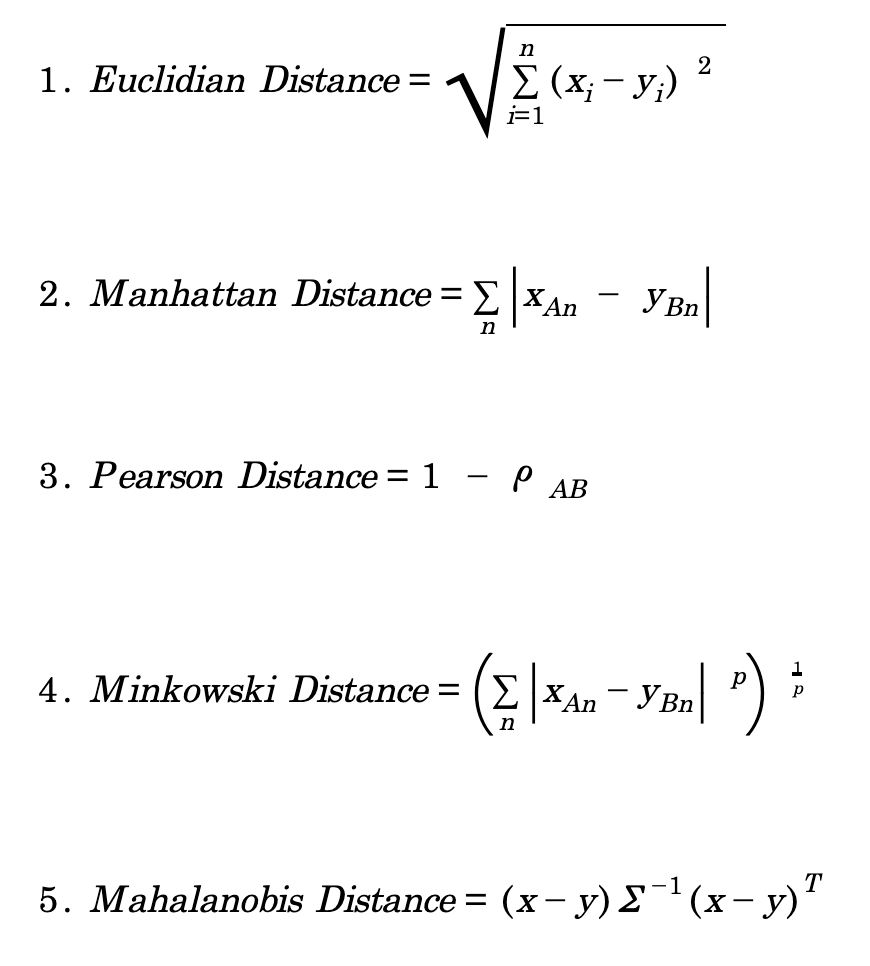
  


- 군집분석과 요인분석의 비교
  + 요인분석
    + R-타입: 요인추출의 대상이 변수
    + Q-타입: 요인추출의 대상이 응답자/사례
  + 분석목적 관점에서 군집분석과 Q-타입 요인분석이 동일하지만 군집 추출 방식에 차이 있음
    + Q-타입 요인분석: 통계적인 방법(응답자들의 평균 및 표준편차간의 상관관계에 기초)으로 응답자들 그룹화
    + 군집분석: 수리적인 방법(개체간의 거리 정보 계산)으로 응답자들 그룹화   

  ➡ 응답자들을 그룹화 할 경우 군집분석 이용하는 것이 바람직

## 14.2. 계층적 군집분석

### (1) 개념 및 주요 이론
- 개념: 주로 군집의 수가 지정되지 않은 상태에서 분류대상 개체를 탐색적으로 그룹화하기 위한 군집분석 방법
  + 병합방법 (bottom-up): 전체 개체 수 N개에서 시작하여 최종적으로 하나의 군집이 남을 때까지 순차적으로 유사한 개체들을 병합해 나가는 방식
  + 분할방법 (top-down): 모든 개체들을 포함하고 있는 하나의 군집에서 시작하여   최종적으로 전체 개체 수인 N개의 군집으로 분할될 때까지 순차적으로 상이한 개체들을 분할해 나가는 방식
  + 일반적으로 병합방식 채택
- 병합방식의 계층적 군집화 방법
  + ***최단 연결법*** : 각 군집에 속하는 임의의 두 개체들 사이의 거리 중 최단거리를 두 군집간의 거리로 정의
  + ***최장 연결법*** : 각 군집에 속하는 임의의 두 개체들 사이의 거리 중 최장거리를 두 군집간의 거리로 정의
  + ***평균 연결법*** : 각 군집에 속하는 모든 개체들의 평균거리를 두 군집간의 거리로 정의
  + ***중심 연결법*** : 각 군집에 속하는 모든 개체들의 중심 위치에 있는 개체간의 거리를 두 군집간의 거리로 정의
  + ***중위수 연결법*** : 중위수에 해당하는 거리(각 군집에 속하는 임의의 두 개체들의 거리 평균을 합하여 2로 나눈 값)를 두 군집간의 거리로 정의
  + ***Ward의 방법*** : 잔차 제곱합(각 군집에 속한 개체가 해당 군집의 평균과의 거리 편차를 제곱)의 증가를 최소화할 수 있는 지점간의 거리를 두 군집간의 거리로 정의

  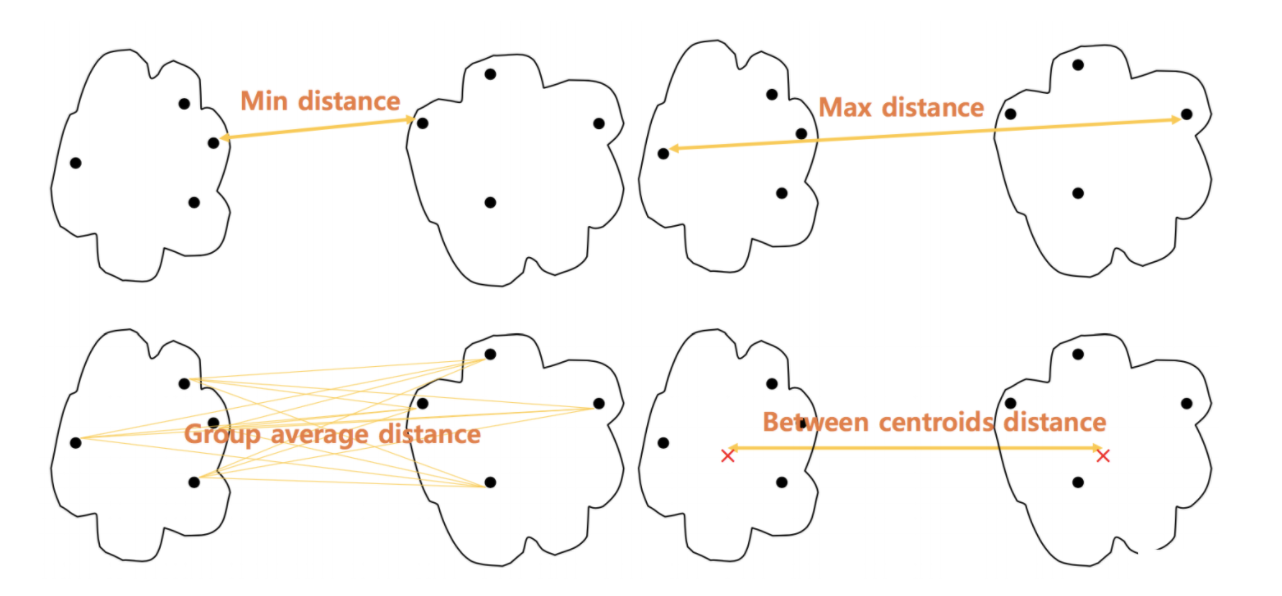



- 군집 수 결정 방법
  + 덴드로그램: 
    + 군집화 일정표의 결과를 시각적으로 옮긴 군집 현황 도표
    + 각 단계에서 관측치의 군집화를 통해 형성된 그룹과 이들의 유사성을 표시하는 트리 다이어그램
    + 가지의 길이(거리)를 바탕으로 적절한 군집의 개수 정할 수 있음

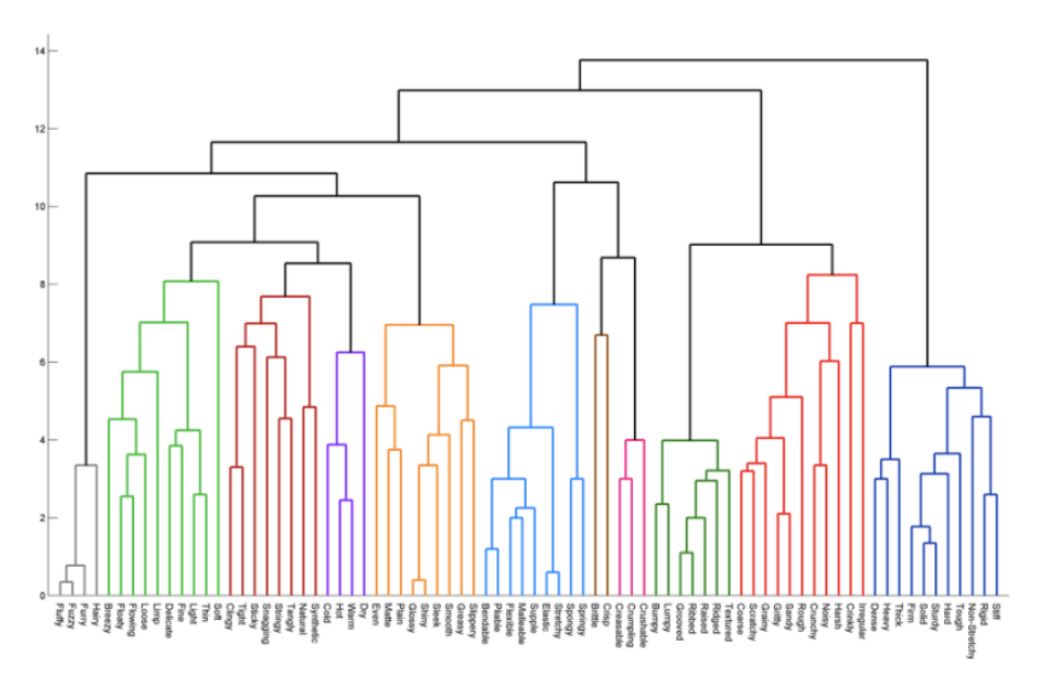

### (2) 분석 및 해석
- 문제
  + A 쇼핑은 RFM 기반의 고객세분화를 수행하고자 500명의 고객을 무작위로 샘플링 하여  
Recency, Frequency, Monetery 세 가지 변수를 통한 계층적 군집분석을 진행해보자.

In [3]:
# 모듈 및 데이터 탑재
import pandas as pd
from scipy.cluster.hierarchy import linkage

df = pd.read_csv('Ashopping.csv',sep=',',encoding='CP949')
data_temp = df.sample(n=500, random_state=111) # 데이터 500개 랜덤 샘플링
X = data_temp[['Recency','Frequency','Monetary']]

X.head()

,Recency,Frequency,Monetary
190,6,1,1
104,7,6,7
295,5,3,4
12,7,3,4
87,7,3,5


In [5]:
# 계층적 군집분석
cluster = linkage(X, method='average', metric='euclidean')
print(cluster[490:])

    # method(군집화방법): single/complete/average/centroid/median/ward
    # metric(유사성측정방법): euclidean/cityblock

[[969.         979.           2.43557142  72.        ]
 [978.         988.           2.60070576  33.        ]
 [984.         991.           2.78913055  40.        ]
 [981.         989.           3.05800305 374.        ]
 [986.         990.           3.11871825  81.        ]
 [161.         993.           3.55293738 375.        ]
 [994.         995.           3.67802103 456.        ]
 [987.         992.           3.97824721  44.        ]
 [996.         997.           6.01862823 500.        ]]


- 결과 해석
  + 1~2열: 병합되는 군집 번호
  + 3열: 군집 간 거리
  + 4열: 군집에 속한 개체 수
  + 끝에서 두번째 단계의 군집 간 거리가 3.98에서 마지막 단계인 6.01으로 66%가 증가하였기에 2개의 군집으로 나누는 것이 적절
  + 아래 덴드로그램으로 시각화해서 더 직관적으로 살펴보겠다

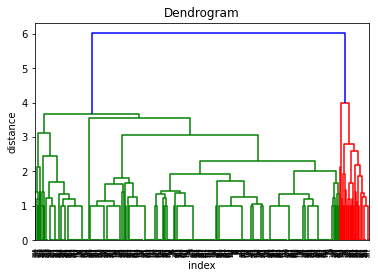

In [6]:
# 모듈 불러오기
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt

# 덴드로그램 그리기
%matplotlib inline
plt.title('Dendrogram')
plt.xlabel('index')
plt.ylabel('distance')
dendrogram(cluster) # 군집일정표 넣기
plt.show()

- 결과 해석
  + 가지의 길이가 긴 2개의 군집 혹은 3개 군집 선택 가능
  + 본 군집 분석의 목적이 RFM을 중심으로 고객세분화이므로 3개의 고객 그룹으로 고객들 관리하는 것이 마케팅 관점에서 더욱 유용

## 14.3. 비계층적 군집분석
- 계층적 군집분석은 빅데이터 대상으로 적용시키기 무리
- K-평균 군집분석

### (1) 개념 및 주요 이론
- 비계층적 군집분석의 군집화 방법
  + 순차적 군집화 
    + 군집의 중심 정해짐 > 사전에 지정된 값의 거리 안에 있는 모든 개체들이 같은 군집으로 분류 > 새로운 군집의 중심 > 순차적으로 군집화가 반복
    + 예시. K-평균 군집분석
  + 동시 군집화: 사전에 지정된 일정 값 안에 해당하는 개체들을 소속시킴으로써 몇 개의 군집을 동시에 결정
  + 최적할당 군집화: 사전에 주어진 군집의 수를 형성 위해 군집 내의 평균거리를 계산하는 최적화 기준 도출하고,  
  이에 따라 최초의 군집에서 다른 군집으로 다시 할당될 수 있음

- K-평균 군집분석
  + 주어진 분류 대상 개체를 K개의 군집으로 형성
  + 군집과 개체간의 거리 편차의 분산을 최소화하는 방향으로 군집 형성
  + 군집화 속도가 빨라 대용량 데이터에 적합한 군집분석 방법
  + BUT 군집의 개수(K)를 명확히 해야하고 최초 설정된 초기값(seed)에 따라서 군집분석의 결과가 상이할 수 있음

- K-평균 군집분석 알고리즘
  1. 군집의 수(K)를 지정한다.
  2. 전체 개체 중에서 K개 만큼의 초기 씨앗개체(seed)를 임의로 지정
  3. K개의 씨앗개체와 나머지 모든 개체와의 거리를 계산한 후 각 개체들은 가장 가까운 씨앗개체와 동일한 군집으로 초기 군집이 할당
  4. 각 초기 군집에서 군집의 중심 개체로 해당 군집의 씨앗개체를 변경
  5. 군집의 중심 즉, 씨앗개체의 변화가 없을 때까지 상기 3,4의 과정을 반복

  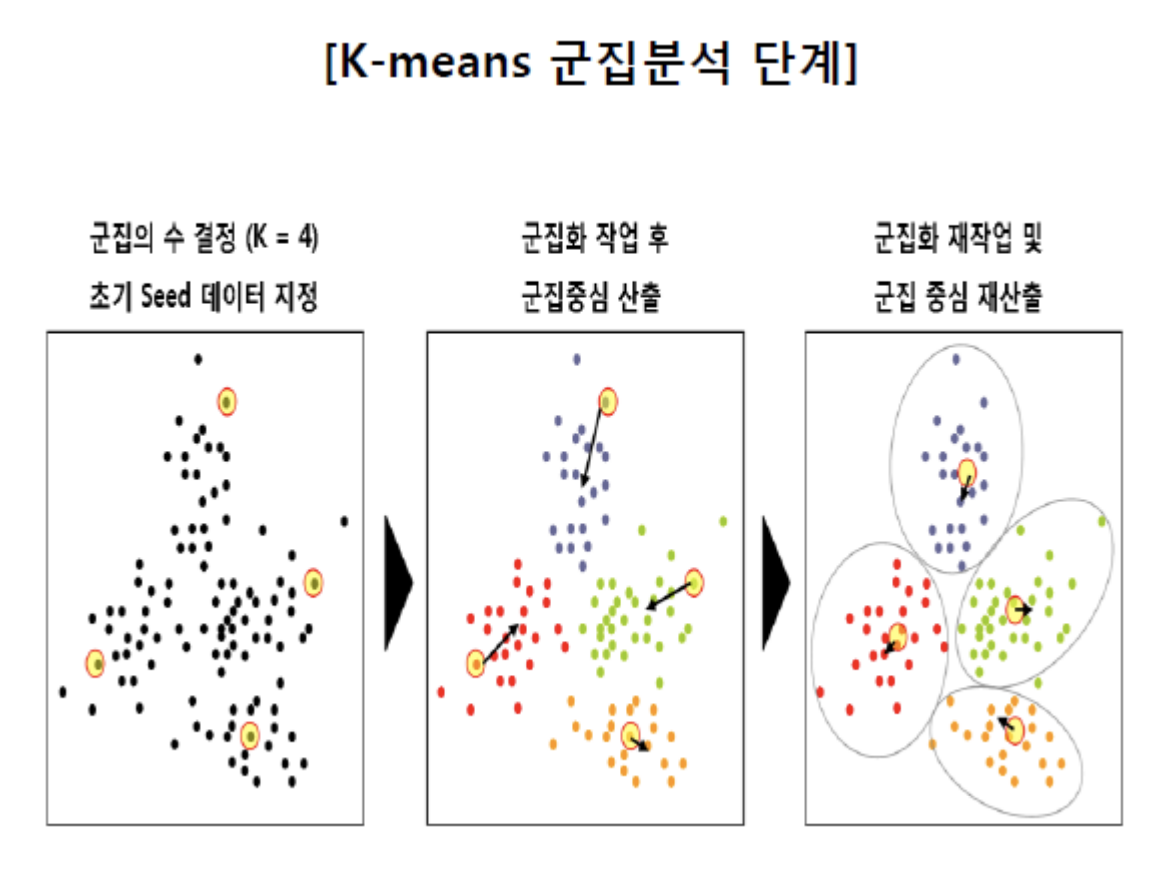

### (2) 분석 및 해석
- 문제
  + 앞서 계층적 군집분석 실습에서 진행해본 RFM 기반의 고객세분화를 K 평균 군집분석으로도 수행해보자.

In [10]:
# 모듈 및 데이터 탑재
import pandas as pd
from sklearn.cluster import KMeans

df = pd.read_csv('Ashopping.csv', sep=',', encoding='CP949')
X = df[['Recency','Frequency','Monetary']]
X.head(3)

,Recency,Frequency,Monetary
0,7,3,4
1,2,3,3
2,7,3,2


In [12]:
# 비계층적 군집분석
model = KMeans(n_clusters=3, max_iter=20, random_state=19).fit(X)
X['cluster_id'] = model.labels_   # 각 고객마다 속하는 군집 라벨링

  # n_cluster(군집수), max_iter(최대 반복횟수)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [15]:
# 군집별 고객 수 확인
clu1 = X[X.cluster_id==0]
clu2 = X[X.cluster_id==1]
clu3 = X[X.cluster_id==2]
print('군집1의 고객 수 \n', clu1.cluster_id.count())
print('군집2의 고객 수 \n', clu2.cluster_id.count())
print('군집3의 고객 수 \n', clu3.cluster_id.count())

# 군집별 평균 RFM 확인
print('군집1의 RFM평균 \n', clu1.Recency.mean(), clu1.Frequency.mean(), clu1.Monetary.mean())
print('군집2의 RFM평균 \n', clu2.Recency.mean(), clu2.Frequency.mean(), clu2.Monetary.mean())
print('군집3의 RFM평균 \n', clu3.Recency.mean(), clu3.Frequency.mean(), clu3.Monetary.mean())

군집1의 고객 수 
 512
군집2의 고객 수 
 411
군집3의 고객 수 
 77
군집1의 RFM평균 
 6.8359375 3.212890625 2.892578125
군집2의 RFM평균 
 6.9391727493917275 4.600973236009732 5.768856447688565
군집3의 RFM평균 
 1.7792207792207793 3.207792207792208 3.7532467532467533


- 결과 해석
  + RFM: 구매 가능성이 높은 고객을 선정하기 위한 데이터 분석방법
    + Recency - 거래의 최근성: 고객이 얼마나 최근에 구입했는가?
    + Frequency - 거래빈도: 고객이 얼마나 빈번하게 우리 상품을 구입했나?
    + Monetary - 거래규모: 고객이 구입했던 총 금액은 어느 정도인가?
  + 군집의 규모: 군집1 > 군집2 > 군집3
  + RFM 비교 시 군집2는 우량고객
  + FM 비교 시 군집1과 3은 유사한 그룹이지만 Recency 값이 매우 큰 차이를 보임
  + 군집3은 최근 구매이력이 없는 잠재 이탈고객 그룹